In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels
!pip install yfinance
!pip install mlxtend
!pip install openpyxl

Model Accuracy: 0.98


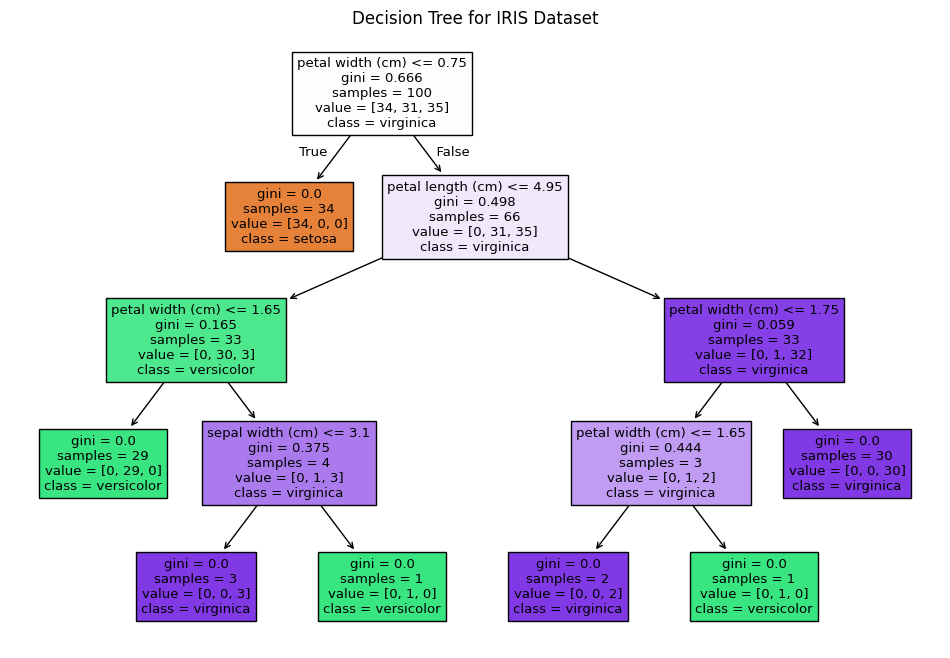

In [ ]:
# Q1: Decision Tree Classification on IRIS dataset using CART algorithm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import Decisionaccuracy_score
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the CART decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for IRIS Dataset")
plt.show()


In [37]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Corrected file path using raw string
df = pd.read_excel('Online_Retail.xlsx')
# Preprocess the data
df = df[df['InvoiceNo'].notnull() & df['Description'].notnull()]
df = df[df['Quantity'] > 0]

# Group products by transaction
basket = df.groupby(['InvoiceNo'])['Description'].apply(list).reset_index(name='Items')

# One-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(basket['Items']).transform(basket['Items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth with min support = 0.01
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with min confidence = 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print rules
for _, row in rules.iterrows():
    print(f"{set(row['antecedents'])} -> {set(row['consequents'])}, "
          f"Support={row['support']:.2f}, Lift={row['lift']:.2f}, Confidence={row['confidence']:.2f}")


{"POPPY'S PLAYHOUSE BEDROOM "} -> {"POPPY'S PLAYHOUSE KITCHEN"}, Support=0.02, Lift=34.17, Confidence=0.74
{"POPPY'S PLAYHOUSE KITCHEN"} -> {"POPPY'S PLAYHOUSE BEDROOM "}, Support=0.02, Lift=34.17, Confidence=0.72
{'JAM MAKING SET WITH JARS', 'SET OF 3 CAKE TINS PANTRY DESIGN '} -> {'JAM MAKING SET PRINTED'}, Support=0.01, Lift=9.39, Confidence=0.54
{'JAM MAKING SET PRINTED', 'SET OF 3 CAKE TINS PANTRY DESIGN '} -> {'JAM MAKING SET WITH JARS'}, Support=0.01, Lift=10.55, Confidence=0.59
{'ALARM CLOCK BAKELIKE RED '} -> {'ALARM CLOCK BAKELIKE GREEN'}, Support=0.03, Lift=12.51, Confidence=0.61
{'ALARM CLOCK BAKELIKE GREEN'} -> {'ALARM CLOCK BAKELIKE RED '}, Support=0.03, Lift=12.51, Confidence=0.65
{'ALARM CLOCK BAKELIKE PINK'} -> {'ALARM CLOCK BAKELIKE RED '}, Support=0.02, Lift=11.50, Confidence=0.60
{'ALARM CLOCK BAKELIKE PINK'} -> {'ALARM CLOCK BAKELIKE GREEN'}, Support=0.02, Lift=10.97, Confidence=0.53
{'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE PINK'} -> {'ALARM CLOCK BAKELI

In [33]:
# Q3: Text classification using 20 Newsgroups dataset and knowledge taxonomy
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define category mapping
category_map = {
    'misc.forsale': 'Sales',
    'rec.motorcycles': 'Motorcycles',
    'rec.sport.baseball': 'Baseball',
    'sci.crypt': 'Cryptography',
    'sci.space': 'Space'
}
categories = list(category_map.keys())

# Load the training subset of the dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# Vectorize the training text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(newsgroups_train.data)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, newsgroups_train.target)

# Define input sentences for prediction
input_data = [
    "The curveballs of right handed pitchers tend to curve to the left",
    "Caesar cipher is an ancient form of encryption",
    "This two-wheeler is really good on slippery roads"
]

# Vectorize and predict the category of input sentences
X_input = vectorizer.transform(input_data)
predicted = clf.predict(X_input)

# Print the input sentence with its predicted category
for sentence, index in zip(input_data, predicted):
    category = newsgroups_train.target_names[index]
    readable_category = category_map[category]
    print(f"Input: {sentence}\nPredicted Category: {readable_category}\n")


Input: The curveballs of right handed pitchers tend to curve to the left
Predicted Category: Baseball

Input: Caesar cipher is an ancient form of encryption
Predicted Category: Cryptography

Input: This two-wheeler is really good on slippery roads
Predicted Category: Motorcycles

